https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/1200px-President_Barack_Obama.jpg
--2022-03-26 05:54:28--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/1200px-President_Barack_Obama.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308833 (302K) [image/jpeg]
Saving to: ‘src.jpg’

src.jpg             100%[===================>] 301.59K  --.-KB/s    in 0.07s   

2022-03-26 05:54:28 (4.13 MB/s) - ‘src.jpg’ saved [308833/308833]



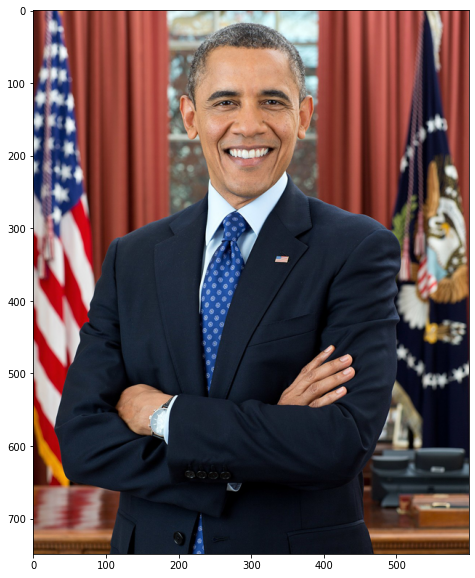

In [14]:
#@title 讀取來源網路圖片
from PIL import Image, ImageDraw
from IPython.display import display

import os
from PIL import Image
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/1200px-President_Barack_Obama.jpg' #@param {type:"string"}
print(url)
cmd=f"wget {url} -O src.jpg"  
! $cmd 

if os.path.isfile('src.jpg'):
  im = Image.open('src.jpg')
  w_ = 600
  h_ = int((w_ / im.width) * im.height)  
  new_img = im.resize((w_,h_))
  plt.figure(figsize = (20,10))
  plt.imshow(new_img)

In [1]:
#@title 安裝 face recognition
! pip install face_recognition

     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=8636e5dc7a7f81ea96b6d0a1d9e739b2fe04d62cf388aa9134786202cc811bcf
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [15]:
#@title 建立臉部編碼
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

def build_encoding(src_image, src_name):
  img = face_recognition.load_image_file(src_image)
  face_encoding = face_recognition.face_encodings(img)[0]
  return face_encoding, src_name

face_encoding, face_name = build_encoding('src.jpg', 'obama')
len(face_encoding)
known_face_encodings = []
known_face_names = []
known_face_encodings.append(face_encoding)
known_face_names.append(face_name)

https://www.whitehouse.gov/wp-content/uploads/2021/01/44_barack_obama_family.jpg
--2022-03-26 05:54:40--  https://www.whitehouse.gov/wp-content/uploads/2021/01/44_barack_obama_family.jpg
Resolving www.whitehouse.gov (www.whitehouse.gov)... 192.0.66.168, 2a04:fa87:fffd::c000:42a8
Connecting to www.whitehouse.gov (www.whitehouse.gov)|192.0.66.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 673501 (658K) [image/jpeg]
Saving to: ‘dst.jpg’

dst.jpg             100%[===================>] 657.72K  --.-KB/s    in 0.1s    

2022-03-26 05:54:40 (5.03 MB/s) - ‘dst.jpg’ saved [673501/673501]



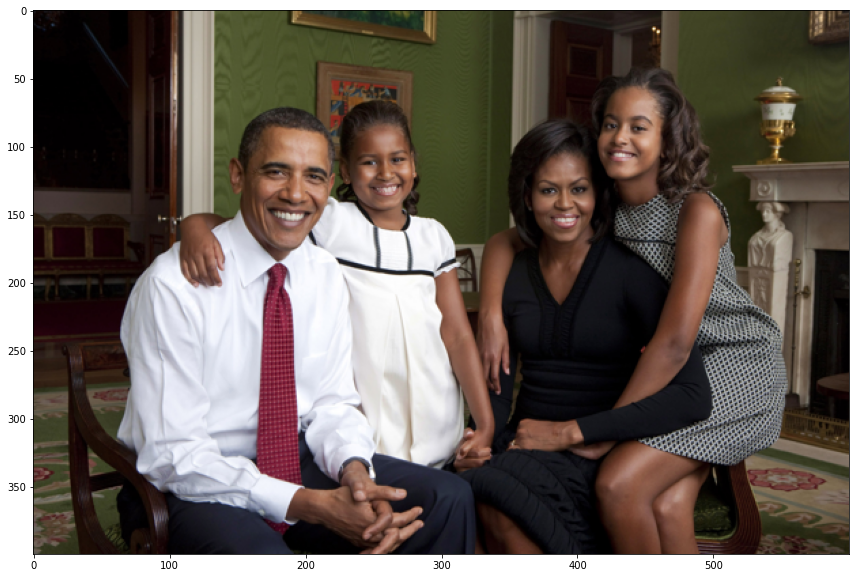

In [16]:
#@title 讀取目標網路圖片
from PIL import Image, ImageDraw
from IPython.display import display

import os
from PIL import Image
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
url = 'https://www.whitehouse.gov/wp-content/uploads/2021/01/44_barack_obama_family.jpg' #@param {type:"string"}
print(url)
cmd=f"wget {url} -O dst.jpg"  
! $cmd 

if os.path.isfile('dst.jpg'):
  im = Image.open('dst.jpg')
  w_ = 600
  h_ = int((w_ / im.width) * im.height)  
  new_img = im.resize((w_,h_))
  plt.figure(figsize = (20,10))
  plt.imshow(new_img)



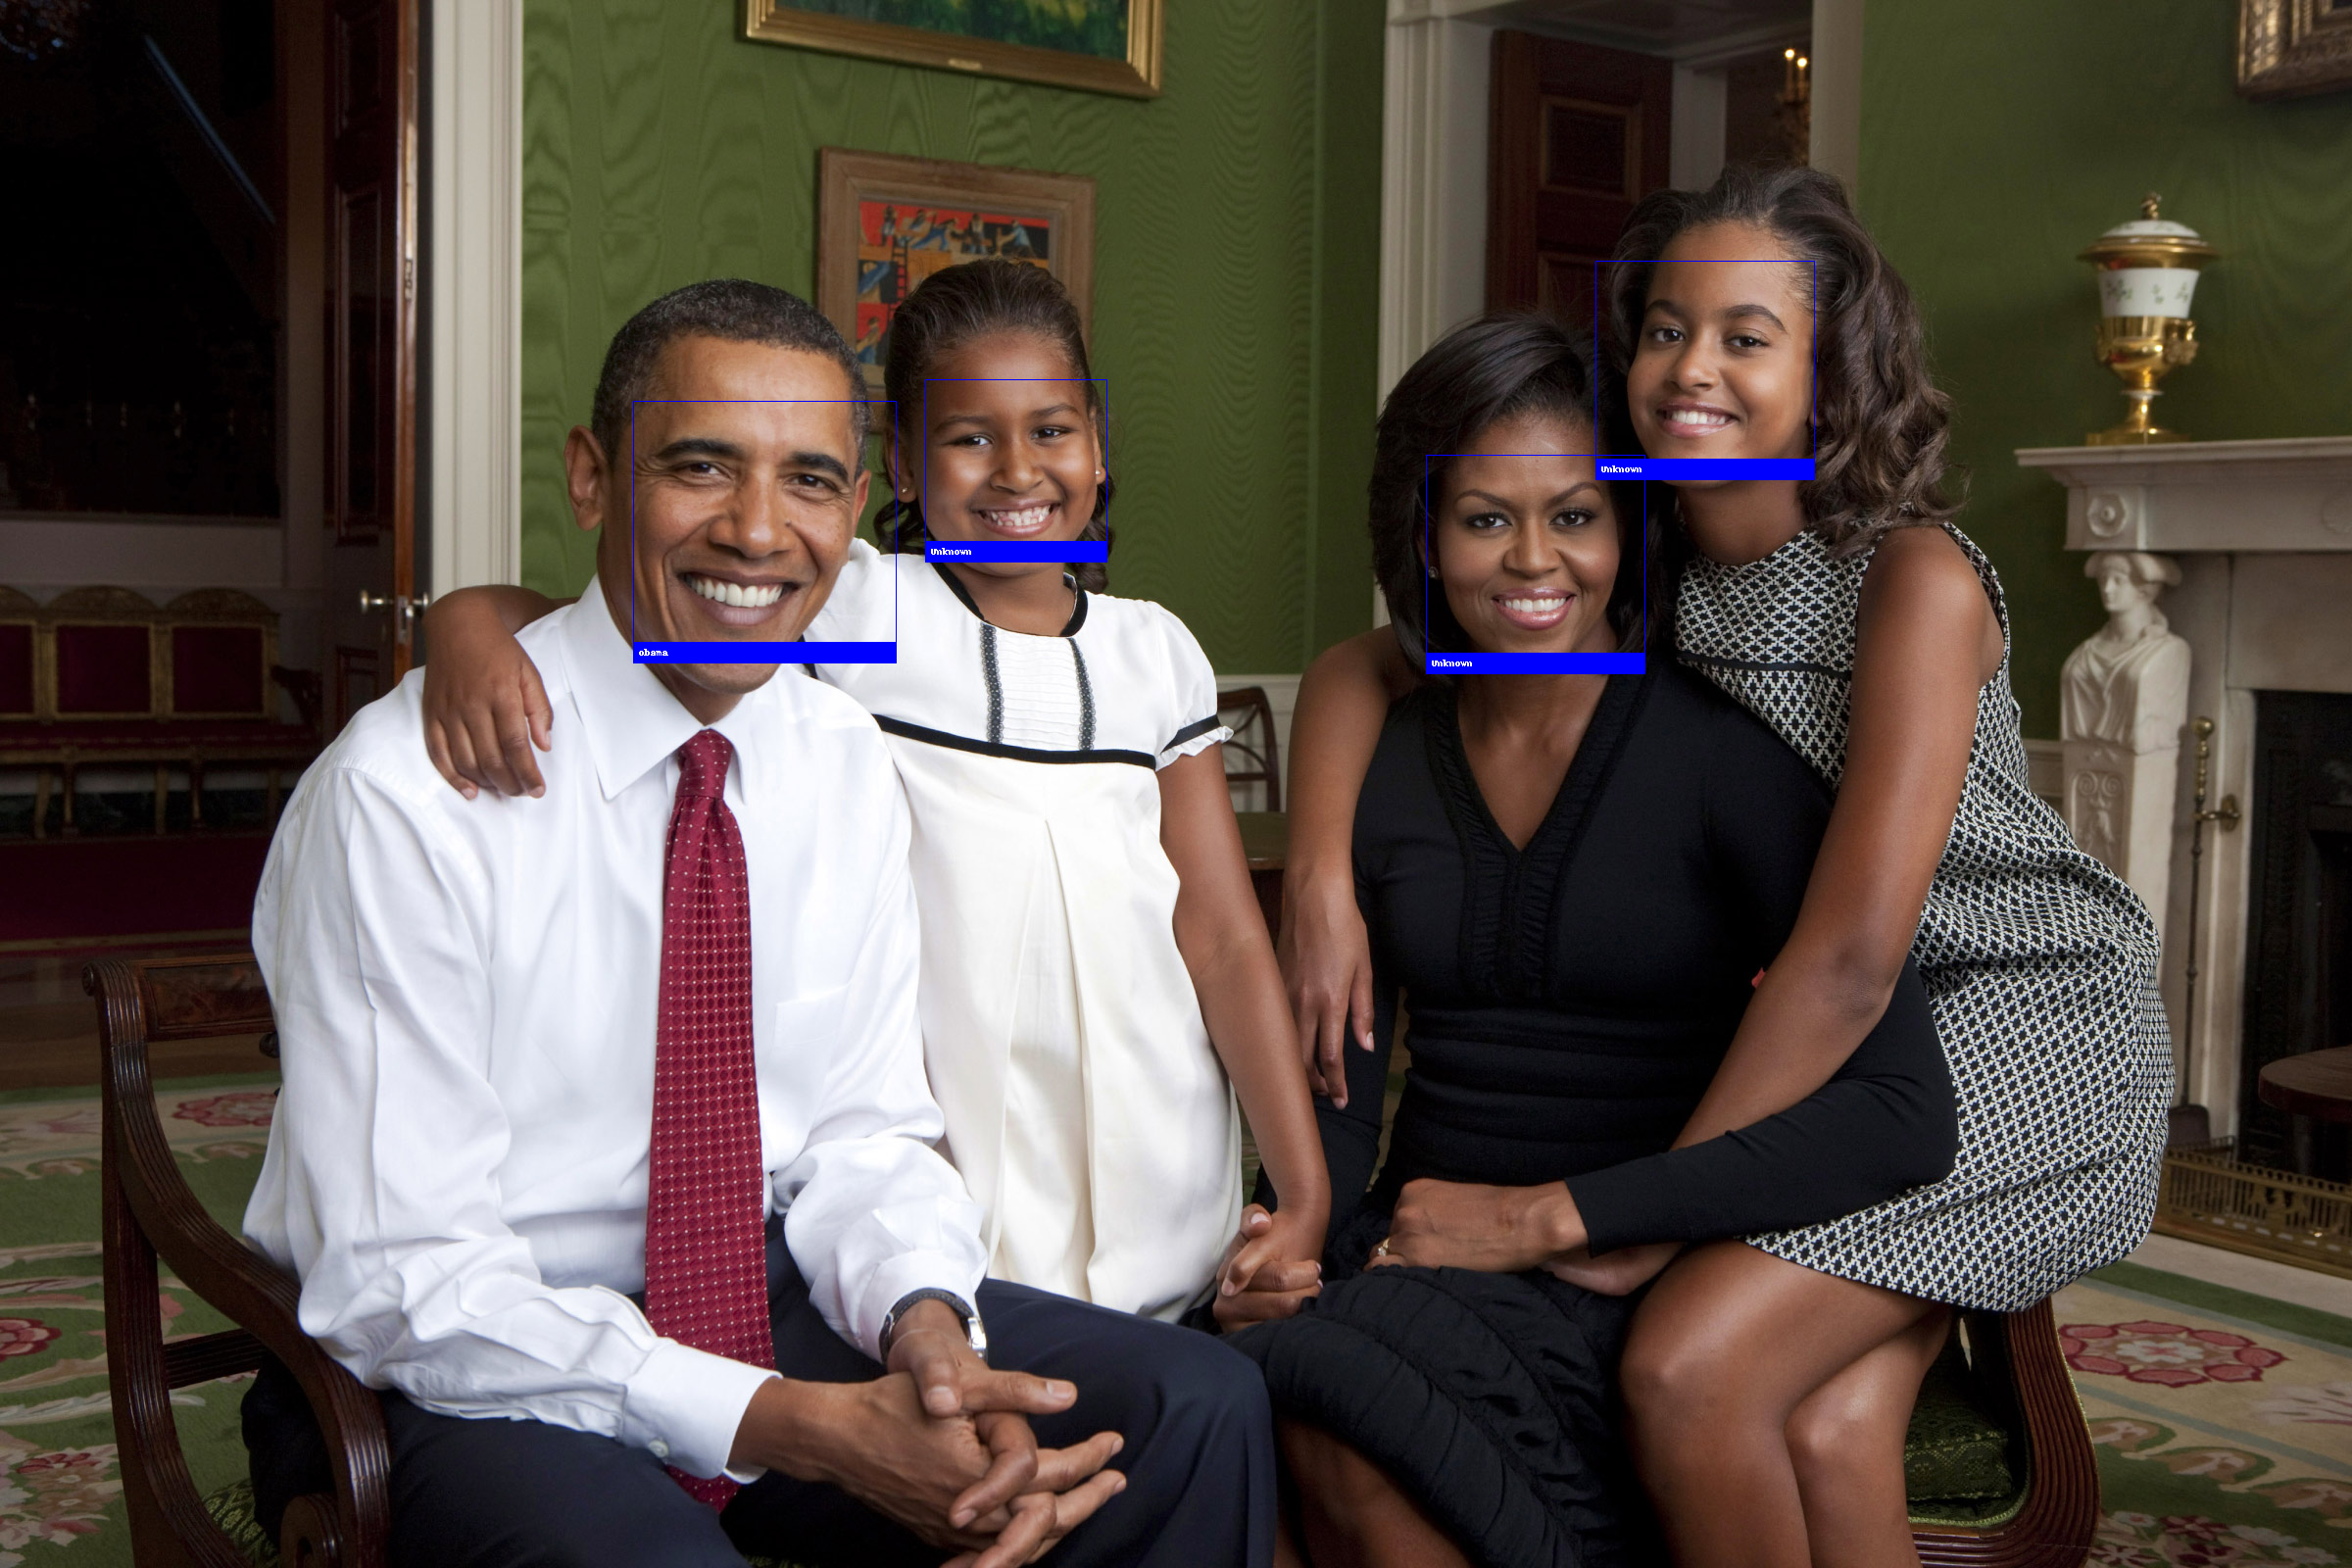

In [17]:
#@title 識別圖片身分
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("dst.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)